In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import random
# mine
import sys
sys.path.append("../src")
from pipeline_ddpm_sketch2img import DDPMSketch2ImgPipeline

In [2]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
pipe = DDPMSketch2ImgPipeline.from_pretrained("../model/from_init_test").to("cuda")
dataset = torchvision.datasets.FashionMNIST("../data/FashionMNIST", download=False)

In [4]:
image_np = dataset.data[0].numpy()
image_pil = Image.fromarray(image_np)
sketch_np = cv2.Canny(image_np, 200, 200)
sketch_pil = Image.fromarray(sketch_np)
image_tensor = torch.from_numpy(image_np).unsqueeze(0).float()
sketch_tensor = torch.from_numpy(sketch_np).unsqueeze(0).float()

False


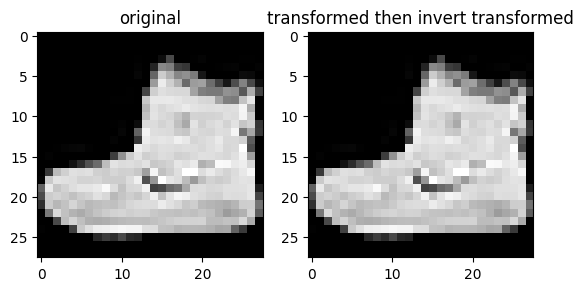

In [5]:
round_trip = pipe.denormalize(pipe.normalize(image_tensor))
fig, axs = plt.subplots(1,2)

axs[0].set_title("original")
axs[0].imshow(image_tensor[0], "gray")

axs[1].set_title("transformed then invert transformed")
axs[1].imshow(round_trip[0], "gray")

# Why are the numbers slightly different?
print(torch.equal(pipe.denormalize(pipe.normalize(image_tensor)), image_tensor))

In [6]:
generated_image_pil = pipe(sketch_pil)
fig, axs = plt.subplots(1,3)

axs[0].set_title("image")
axs[0].imshow(image_pil, "gray")

axs[1].set_title("sketch")
axs[1].imshow(sketch_pil, "gray")

axs[2].set_title("generated")
axs[2].imshow(generated_image_pil, "gray")

100%|██████████| 1000/1000 [00:16<00:00, 61.01it/s]


AssertionError: (c, h, w) but torch.Size([1, 1, 28, 28])